In [8]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer 
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.cm as cm
from matplotlib import rcParams
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re
from textblob import TextBlob
import string
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing the dataset
df = pd.read_csv('VacineCard_Nohas.csv')
df = df[['date','time','username','name','tweet','likes_count']]

In [3]:
df.head()

,date,time,username,name,tweet,likes_count
0,2021-09-26,16:56:36,josecru16191249,josecruz,Here’s my vaccine card https://t.co/Zfb1P81jSE,1
1,2021-09-26,16:52:34,ilovetaguig1,I Love Taguig,"𝗙𝗼𝗿 𝗦𝗲𝗽𝘁. 𝟮𝟳, 𝟮𝟬𝟮𝟭 (𝗠𝗼𝗻𝗱𝗮𝘆), those who missed ...",4
2,2021-09-26,16:49:55,bushidoshi,Best Year Ever,@GirlFuturist @brucewilson Arts degree with va...,5
3,2021-09-26,16:49:35,puregoldj,Jay H Goldberg,@chipfranklin @POTUS What exactly is a « vacci...,0
4,2021-09-26,16:49:24,wordsleadmeon,Court 🐔🍷😷 (🏡549 for my 5yo nieces. 2xPfizer'd),@prairiecentrist In BC he wouldn't even be all...,2


In [4]:
def preprocess_tweets(tweet):
    
    fo = open("stopwords.txt", "r+")
    stop_words = list(fo.read().split(','))
    translation={39:None}
    processed_tweet = tweet
    processed_tweet=' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",tweet).split())
    processed_tweet = " ".join(word for word in processed_tweet.split() if word not in str(stop_words).translate(translation))
    return(processed_tweet)
df['Processed Tweet'] = df['tweet'].apply(lambda x: preprocess_tweets(x.lower()))

In [5]:
tweets_df = df
tweets_df

,date,time,username,name,tweet,likes_count,Processed Tweet
0,2021-09-26,16:56:36,josecru16191249,josecruz,Here’s my vaccine card https://t.co/Zfb1P81jSE,1,vaccine card
1,2021-09-26,16:52:34,ilovetaguig1,I Love Taguig,"𝗙𝗼𝗿 𝗦𝗲𝗽𝘁. 𝟮𝟳, 𝟮𝟬𝟮𝟭 (𝗠𝗼𝗻𝗱𝗮𝘆), those who missed ...",4,missed second dose schedule indicated vaccinat...
2,2021-09-26,16:49:55,bushidoshi,Best Year Ever,@GirlFuturist @brucewilson Arts degree with va...,5,arts degree vaccine status bio bingo card sund...
3,2021-09-26,16:49:35,puregoldj,Jay H Goldberg,@chipfranklin @POTUS What exactly is a « vacci...,0,exactly vaccine passport becta scare word anti...
4,2021-09-26,16:49:24,wordsleadmeon,Court 🐔🍷😷 (🏡549 for my 5yo nieces. 2xPfizer'd),@prairiecentrist In BC he wouldn't even be all...,2,bc wouldn even allowed patio brother law tried...
...,...,...,...,...,...,...,...
20005,2021-09-09,19:21:24,amoore12321_,Andrew Moore (OLED Model) #MetroidDread #Steam...,@Chilly_MIV Yeah ikr and I lost my vaccine car...,1,miv yeah ikr lost vaccine card pain ass get ne...
20006,2021-09-09,19:20:38,casadormusic,casador,i hate to break it to you but buying a fake va...,0,hate break buying fake vaccine card isn really...
20007,2021-09-09,19:18:33,tlcannady,Teresa Cannady,@Martina Did you ask to see his vaccine card. ...,0,ask see vaccine card thought everyone required...
20008,2021-09-09,19:15:16,kerrylorkovic,Kerry Elliott Lorkovic,"(cont’d) “Bring your vaccine card, picture ide...",0,cont bring vaccine card picture identification...


In [11]:
print("Running sentiment process")
for row in tweets_df.itertuples():
    tweet = tweets_df.at[row[0], 'Processed Tweet']
#run sentiment using TextBlob
    analysis = TextBlob(tweet)
#set value to dataframe
    tweets_df.at[row[0], 'polarity'] = analysis.sentiment[0]
    tweets_df.at[row[0], 'subjectivity'] = analysis.sentiment[1]
#Create Positive / negative column depending on polarity
    if analysis.sentiment[0]>0:
        tweets_df.at[row[0], 'Sentiment'] = "Positive"
    elif analysis.sentiment[0]<0:
        tweets_df.at[row[0], 'Sentiment'] = "Negative"
    else:
        tweets_df.at[row[0], 'Sentiment'] = "Neutral"

Running sentiment process


In [12]:
tweets_df = tweets_df[['Processed Tweet','polarity','subjectivity','Sentiment']]
tweets_df

,Processed Tweet,polarity,subjectivity,Sentiment
0,vaccine card,0.000000,0.000000,Neutral
1,missed second dose schedule indicated vaccinat...,0.053333,0.213333,Positive
2,arts degree vaccine status bio bingo card sund...,0.250000,0.250000,Positive
3,exactly vaccine passport becta scare word anti...,0.250000,0.250000,Positive
4,bc wouldn even allowed patio brother law tried...,0.000000,0.066667,Neutral
...,...,...,...,...
20005,miv yeah ikr lost vaccine card pain ass get ne...,0.136364,0.454545,Positive
20006,hate break buying fake vaccine card isn really...,-0.366667,0.700000,Negative
20007,ask see vaccine card thought everyone required...,0.000000,0.000000,Neutral
20008,cont bring vaccine card picture identification...,0.000000,0.000000,Neutral


In [13]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)\1+',r'\1', text)

In [14]:
tweets_df['Processed Tweet'] = tweets_df['Processed Tweet'].apply(lambda x: cleaning_repeating_char(x))
tweets_df

,Processed Tweet,polarity,subjectivity,Sentiment
0,vacine card,0.000000,0.000000,Neutral
1,mised second dose schedule indicated vacinatio...,0.053333,0.213333,Positive
2,arts degre vacine status bio bingo card sunday...,0.250000,0.250000,Positive
3,exactly vacine pasport becta scare word anti s...,0.250000,0.250000,Positive
4,bc wouldn even alowed patio brother law tried ...,0.000000,0.066667,Neutral
...,...,...,...,...
20005,miv yeah ikr lost vacine card pain as get new one,0.136364,0.454545,Positive
20006,hate break buying fake vacine card isn realy l...,-0.366667,0.700000,Negative
20007,ask se vacine card thought everyone required s...,0.000000,0.000000,Neutral
20008,cont bring vacine card picture identification ...,0.000000,0.000000,Neutral


In [15]:
tokenizer = RegexpTokenizer(r'\w+')
tweets_df['Processed Tweet'] = tweets_df['Processed Tweet'].apply(tokenizer.tokenize)

In [16]:
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data

tweets_df['Processed Tweet'] = tweets_df['Processed Tweet'].apply(lambda x: stemming_on_text(x))

In [17]:
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data

tweets_df['Processed Tweet'] = tweets_df['Processed Tweet'].apply(lambda x:lemmatizer_on_text(x))

In [47]:
X = tweets_df['Processed Tweet']
y = tweets_df['Sentiment']

In [50]:
y = y.replace({'Negative','Neutral','Positive'},{1,2,3})

In [51]:
y

0        2
1        3
2        3
3        3
4        2
        ..
20005    3
20006    1
20007    2
20008    2
20009    2
Name: Sentiment, Length: 20010, dtype: int64

In [61]:
max_len = 10000
tok = Tokenizer(num_words=500)
tok.fit_on_texts(X)
sequences = tok.texts_to_sequences(X)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(sequences_matrix, y, test_size=0.3, random_state=2)

In [63]:
def tensorflow_based_model(): #Defined tensorflow_based_model function for training tenforflow based model
    inputs = Input(name='inputs',shape=[max_len])#step1
    layer = Embedding(2000,50,input_length=max_len)(inputs) #step2
    layer = LSTM(64)(layer) #step3
    layer = Dense(256,name='FC1')(layer) #step4
    layer = Activation('relu')(layer) # step5
    layer = Dropout(0.5)(layer) # step6
    layer = Dense(1,name='out_layer')(layer) #step4 again but this time its giving only one output as because we need to classify the tweet as positive or negative
    layer = Activation('sigmoid')(layer) #step5 but this time activation function is sigmoid for only one output.
    model = Model(inputs=inputs,outputs=layer) #here we are getting the final output value in the model for classification
    return model #function returning the value when we call it

In [64]:
model = tensorflow_based_model() # here we are calling the function of created model
model.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

In [65]:
history=model.fit(X_train,Y_train,batch_size=30,epochs=6, validation_split=0.1)# here we are starting the training of model by feeding the training data
print('Training finished !!')

Epoch 1/6
421/421 [==============================] - 136s 318ms/step - loss: -803.7154 - accuracy: 0.2350 - val_loss: -2094.4270 - val_accuracy: 0.2520
Epoch 2/6
421/421 [==============================] - 134s 319ms/step - loss: -4450.5547 - accuracy: 0.2351 - val_loss: -7193.1216 - val_accuracy: 0.2520
Epoch 3/6
421/421 [==============================] - 132s 314ms/step - loss: -11154.0713 - accuracy: 0.2351 - val_loss: -15285.2188 - val_accuracy: 0.2520
Epoch 4/6
421/421 [==============================] - 133s 316ms/step - loss: -20946.1836 - accuracy: 0.2351 - val_loss: -26375.7148 - val_accuracy: 0.2520
Epoch 5/6
421/421 [==============================] - 131s 311ms/step - loss: -33718.9766 - accuracy: 0.2351 - val_loss: -40440.5703 - val_accuracy: 0.2520
Epoch 6/6
421/421 [==============================] - 130s 310ms/step - loss: -49598.0352 - accuracy: 0.2351 - val_loss: -57511.7070 - val_accuracy: 0.2520
Training finished !!


In [66]:
accr1 = model.evaluate(X_test,Y_test) #we are starting to test the model here

188/188 [==============================] - 22s 114ms/step - loss: -57478.8984 - accuracy: 0.2465


In [67]:
y_pred = model.predict(X_test) #getting predictions on the trained model
y_pred = (y_pred > 0.5)

[[1480    0    0]
 [2130    0    0]
 [2393    0    0]]


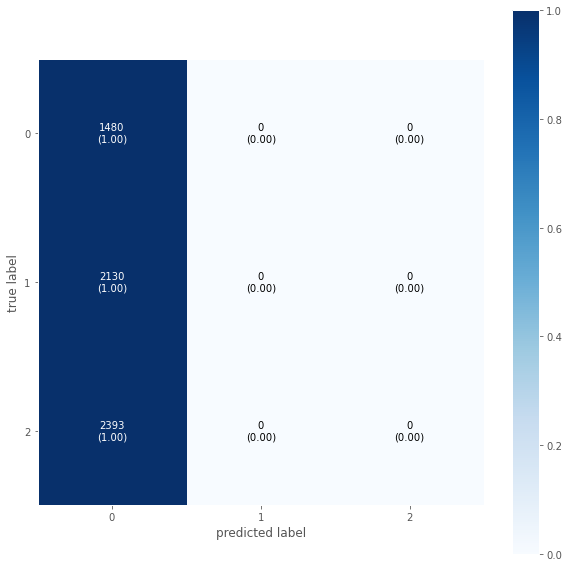

In [68]:
CR = confusion_matrix(Y_test, y_pred)
print(CR)

fig, ax = plot_confusion_matrix(conf_mat = CR, figsize = (10,10),
                                show_absolute = True,
                                show_normed=True,
                                colorbar=True)
plt.show()

In [ ]:
#Removing Punctuation
def remove_punct(text):
 text = "".join([char for char in text if char not in string.punctuation])
 text = re.sub('[0–9]'+, '', text)
 return text
tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text
tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))
#Appliyng Stemmer
ps = nltk.PorterStemmer()
def stemming(text):
    text = [ps.stem(word) for word in text]
    return text
tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text
tw_list.head()